<a href="https://colab.research.google.com/github/Nischit-Stha/learn_sql_with_py/blob/main/Sql_with_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This code demonstrates how to use SQLite with Python to create a database, insert data, query data, and perform basic operations.


import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:

# Connect to SQLite database (or create it if it doesn't exist)
connection = sqlite3.connect('This_stores_data.db')

In [ ]:
# Create a cursor object to execute SQL commands
cursor = connection.cursor()

In [ ]:
# Create a table
cursor.execute('''
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    age INTEGER NOT NULL,
    email TEXT UNIQUE NOT NULL
)
''')
print("Table created successfully.")
# Commit the changes
connection.commit()


Table created successfully.


In [ ]:
#Open the connetion to the database
connection = sqlite3.connect('This_stores_data.db')
cursor = connection.cursor()

In [ ]:
# Thereis 2 way to insert data into the table
# 1. Using a single INSERT statement
cursor.execute('''
INSERT INTO users (name, age, email)
VALUES ('Alice', 25, 'alice@example.com')
''')
cursor.execute('''
INSERT INTO users (name, age, email)
VALUES ('Bob', 30, 'bob@example.com')
''')
print("Data inserted successfully.")

# Commit the changes
connection.commit()

Data inserted successfully.


In [ ]:
#2. Using a parameterized query to prevent SQL injection
data = [
    ('Charlie', 35, " charlie@mail.com"),
    ('David', 28, 'david@gmail.com'),
    ('Eve', 22, 'simer@mail.com'),
]

# Incerting data using parameterized query
cursor.executemany('INSERT INTO users (name, age, email) VALUES (?, ?, ?)', data)
print("Data inserted successfully using parameterized query.")

# Commit the changes
connection.commit()

Data inserted successfully using parameterized query.


In [ ]:
# display all  data in the table
print("Data in the table:")
cursor.execute('SELECT * FROM users')
rows = cursor.fetchall()
for row in rows:
    print(row)

Data in the table:
(1, 'Alice', 25, 'alice@example.com')
(2, 'Bob', 30, 'bob@example.com')
(3, 'Charlie', 35, ' charlie@mail.com')
(4, 'David', 28, 'david@gmail.com')
(5, 'Eve', 22, 'simer@mail.com')


In [ ]:
# Query the all data from the table
conn = sqlite3.connect('This_stores_data.db')
query = 'SELECT * FROM users'
df = pd.read_sql_query(query, conn) # <= Stores the querys iinto a pandas dataframe

df.head() # <= Display the first 5 rows of the dataframe

,id,name,age,email
0,1,Alice,25,alice@example.com
1,2,Bob,30,bob@example.com
2,3,Charlie,35,charlie@mail.com
3,4,David,28,david@gmail.com
4,5,Eve,22,simer@mail.com


In [ ]:
# Update data
cursor.execute('''
UPDATE users
SET age = 26
WHERE name = 'Alice'
''')
connection.commit()
print("Data updated successfully.")

Data updated successfully.


In [ ]:
# Delete data
cursor.execute('''
DELETE FROM users
WHERE name = 'Bob'
''')
connection.commit()
print("Data deleted successfully.")


Data deleted successfully.


In [ ]:
# Query the data again
cursor.execute('SELECT * FROM users')
rows = cursor.fetchall()
print("Data after update and delete:")
for row in rows:
    print(row)


Data after update and delete:
(1, 'Alice', 26, 'alice@example.com')
(3, 'Charlie', 35, ' charlie@mail.com')
(4, 'David', 28, 'david@gmail.com')
(5, 'Eve', 22, 'simer@mail.com')


In [ ]:
#performing Data Analysis using sql
query = "Select * from users Where age > 25"
df = pd.read_sql_query(query, conn) # <= Stores the querys iinto a pandas dataframe
print("Data after filtering by age:")
df


Data after filtering by age:


,id,name,age,email
0,1,Alice,26,alice@example.com
1,3,Charlie,35,charlie@mail.com
2,4,David,28,david@gmail.com


In [ ]:

#finding the average age of users
query = "SELECT AVG(age) as average_age FROM users"
df = pd.read_sql_query(query, conn) # <= Stores the querys iinto a pandas dataframe
print("Average age of users:")
df

Average age of users:


,average_age
0,27.75


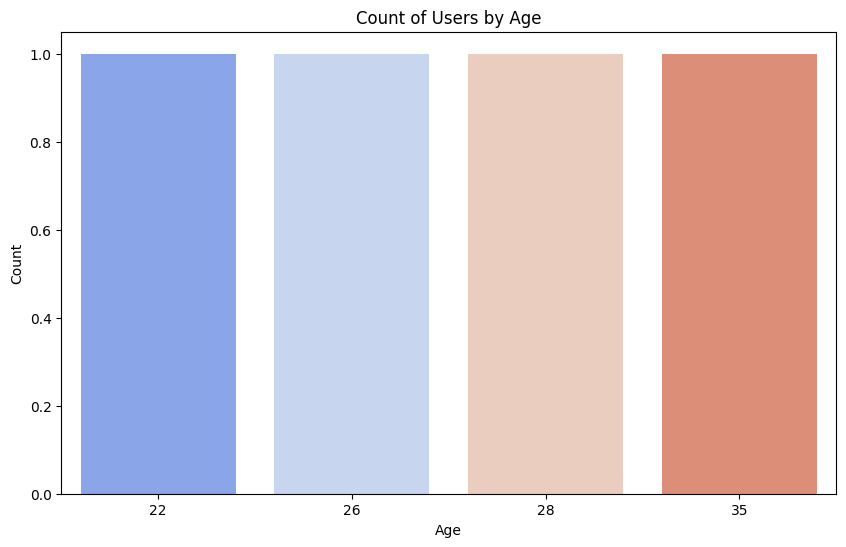

In [ ]:

query = 'SELECT * FROM users'
df = pd.read_sql_query(query, conn)

#Visualing the data using matplotlib and seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, palette='coolwarm')
plt.title('Count of Users by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [ ]:

# Close the connection
connection.close()
print("Connection closed.")

Connection closed.
